# **Instacart Analysis - Part 1: Task 4.10**

## **Content**
> ### 01. Importing Libraries
> ### 02. Importing Data
> ### 03. Data Security
> ### 04. Regional Segmentation
>> #### 04.1. Creating "Region" Column
>> #### 04.2. Spending Habits vs Region
> ### 05. Excluding Low-activity Customers
> ### 06. Customer Profiles
>> #### 06.1. Age Profile
>> #### 06.2. Income Profile
>> #### 06.3. Parent Profile
> ### 07. Profile Descriptive Statistics
>> #### 07.1. Age Profile: Usage Frequency and Expenditure
>> #### 07.2. Income Profile: Usage Frequency and Expenditure
>> #### 07.3. Parent Profile: Usage Frequency and Expenditure
> ### 08. Visualizations
>> #### 08.1. Orders per Day of Week
>> #### 08.2. Sales per Hour of Day
>> #### 08.3. Orders by Department
>>> ##### 08.3.1. Combining Department Dataset
>>> ##### 08.3.2. Creating Visualization
>> #### 08.4. Distribution of Orders by Loyalty
>>> ##### 08.4.1. Total Orders
>>> ##### 08.4.2. Days Since Last Order
>>> ##### 08.4.3. Average Spent
>>> ##### 08.4.4. Total Spent
>> #### 08.5. Ordering Habits based on Region
>>> ##### 08.5.1. Total Orders
>>> ##### 08.5.2. Total Spent
>>> ##### 08.5.3. Age Group Distribution
>>> ##### 08.5.4. Parent Group Distribution
>>> ##### 08.5.5. Income Group Distribution
>> #### 08.6. Age vs. Family Status Ordering Habits
>>> ##### 08.6.1. Total Spent
>>> ##### 08.6.2. Total Orders
>>> ##### 08.6.3. Days Since Last Order
>> #### 08.7. Demographic Classifications
>>> ##### 08.7.1a. Age Group Percentage
>>> ##### 08.7.1b. Age Group vs. Parent Group
>>> ##### 08.7.1c. Age Group vs. Income Group
>>> ##### 08.7.1d. Age Group vs. Loyalty Group
>>> ##### 08.7.2a. Income Group Percentage
>>> ##### 08.7.2b. Income Group vs. Parent Group
>>> ##### 08.7.2c. Income Group vs. Loyalty Group
>>> ##### 08.7.3a. Parent Group Percentage
>>> ##### 08.7.3b. Parent Group vs. Loyalty Group
>>> ##### 08.7.4a. Departments vs. Age Group
>>> ##### 08.7.4b. Departments vs. Income Group
>>> ##### 08.7.4c. Departments vs. Parent Group
>>> ##### 08.7.4d. Departments vs. Loyalty Group
>> #### 08.8. Ordering Habits by Customer Profiles
>>> ##### 08.8.1a. Age Group vs. Order Frequency
>>> ##### 08.8.1b. Income Group vs. Order Frequency
>>> ##### 08.8.1c. Parent Group vs. Order Frequency
>>> ##### 08.8.1d. Region Group vs. Order Frequency
>>> ##### 08.8.2a. Total Expenditure by Age Group
>>> ##### 08.8.2b. Total Expenditure by Income Group
>>> ##### 08.8.2c. Total Expenditure by Parent Group

## 01. Importing Libraries

In [68]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import scipy

## 02. Importing Data

In [2]:
# Creating a path to main project folder
path = r'C:\Users\jboer\OneDrive\Documents\Career Foundry\Instacart Basket Analysis'

In [3]:
# Importing combined orders, products, and customers data
df_all = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_all.pkl'))

In [4]:
# Displaying all columns
pd.set_option('display.max_columns', None)

In [5]:
df_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_label,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spending_flag,median_order_frequency,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,n_dependents,fam_status,income,_merge
0,2539329,1,1,2,8,0.0,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
1,2539329,1,1,2,8,0.0,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
2,2539329,1,1,2,8,0.0,12427,3,0,Original Beef Jerky,23,19,4.4,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
3,2539329,1,1,2,8,0.0,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
4,2539329,1,1,2,8,0.0,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both


## 03. Data Security

##### Having "first_name" and "last_name" columns in the data set paired with "gender", "state", "age", "n_dependents", fam_status", and " income" could pose a potential security risk for the individuals. Since we can still analyze the data without a customer's first and last name, I will remove those columns to prevent any security risk.

In [7]:
# Dropping "first_name" and "last_name" columns for security reasons, dropping "_merge" column because it is not needed.
df_all = df_all.drop(columns = ['first_name', 'last_name', '_merge'])

In [8]:
# Checking success of dropping columns
df_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_label,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spending_flag,median_order_frequency,order_frequency_flag,gender,state,age,date_joined,n_dependents,fam_status,income
0,2539329,1,1,2,8,0.0,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2019-02-17,3,married,40423
1,2539329,1,1,2,8,0.0,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2019-02-17,3,married,40423
2,2539329,1,1,2,8,0.0,12427,3,0,Original Beef Jerky,23,19,4.4,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2019-02-17,3,married,40423
3,2539329,1,1,2,8,0.0,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2019-02-17,3,married,40423
4,2539329,1,1,2,8,0.0,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2019-02-17,3,married,40423


## 04. Regional Segmentation

### 04.1. Creating "Region" Column

In [ ]:
# Checking frequency of "state" column
df_all['state'].value_counts(dropna = False)

In [9]:
# Creating list for loop code to place values
result = []
for value in df_all['state']:
    if value in ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']:
        result.append('Northeast')
    elif value in ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']:
        result.append('Midwest')
    elif value in ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']:
        result.append('South')
    elif value in ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']:
        result.append('West')
    else:
        result.append('No region')

In [10]:
# Assigning values to new column "region"
df_all['region'] = result

In [11]:
# Checking frequency of new column "region"
df_all['region'].value_counts(dropna = False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [293]:
# Checking "region" column in dataset
df_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_label,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spending_flag,median_order_frequency,order_frequency_flag,gender,state,age,date_joined,n_dependents,fam_status,income,region,exclusion_flag
0,2539329,1,1,2,8,0.0,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Keep
1,2539329,1,1,2,8,0.0,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Keep
2,2539329,1,1,2,8,0.0,12427,3,0,Original Beef Jerky,23,19,4.4,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Keep
3,2539329,1,1,2,8,0.0,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Keep
4,2539329,1,1,2,8,0.0,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Keep


### 04.2. Spending Habits vs Region

In [13]:
# Creating a crosstab to compare "region" and "spending_flag" columns
crosstab = pd.crosstab(df_all['region'], df_all['spending_flag'], dropna = False)

In [14]:
# Viewing crosstab
print(crosstab)

spending_flag  High spender  Low spender
region                                  
Midwest               29265      7568060
Northeast             18642      5704094
South                 40564     10751321
West                  31223      8261690


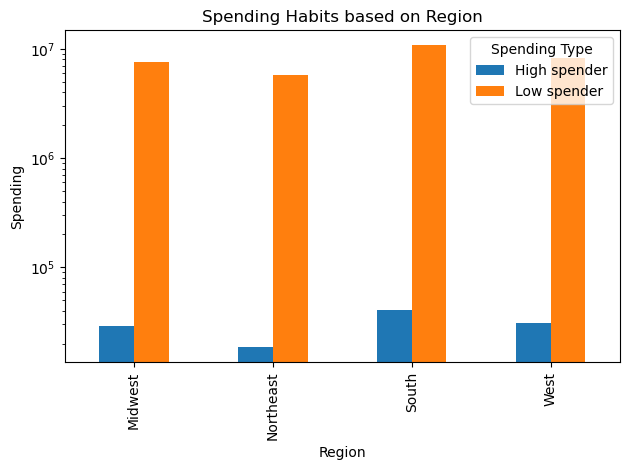

In [107]:
# Creating a bar chart for easier interpretation
bar_region = crosstab.plot.bar()
plt.xlabel('Region')
plt.ylabel('Spending')
plt.title('Spending Habits based on Region')
plt.yscale('log')
plt.legend(title="Spending Type")

# Adjust layout to ensure everything fits 
plt.tight_layout() 

# Save the figure with bounding box options 
bar_region_fig = plt.gcf()

In [108]:
# Exporting "Spending Habits based on Region" bar chart
bar_region_fig.savefig(os.path.join(path, '04 Analysis','Visualizations','Task 4.10', 'bar_region.png'))

## 05. Excluding Low-activity Customers

In [16]:
# Creating condition for customers with less than 5 orders and marking them "Exclude" in new column "exclusion_flag"
df_all.loc[df_all['max_order'] <5, 'exclusion_flag'] = 'Exclude'

In [17]:
# Creating condition for customers with greater than or equal to 5 orders and marking them "Keep" in new column "exclusion_flag"
df_all.loc[df_all['max_order'] >=5, 'exclusion_flag'] = 'Keep'

In [18]:
# Checking creation of new column "exclusion_flag"
df_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_label,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spending_flag,median_order_frequency,order_frequency_flag,gender,state,age,date_joined,n_dependents,fam_status,income,region,exclusion_flag
0,2539329,1,1,2,8,0.0,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Keep
1,2539329,1,1,2,8,0.0,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Keep
2,2539329,1,1,2,8,0.0,12427,3,0,Original Beef Jerky,23,19,4.4,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Keep
3,2539329,1,1,2,8,0.0,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Keep
4,2539329,1,1,2,8,0.0,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Keep


In [19]:
# Checking frequency of "exclusion_flag" column
df_all['exclusion_flag'].value_counts(dropna = False)

exclusion_flag
Keep       30964564
Exclude     1440295
Name: count, dtype: int64

In [37]:
# Creating crosstab to verify values in "exclusion_flag"
crosstab_exclude = pd.crosstab(df_all['max_order'], df_all['exclusion_flag'],dropna = False)

In [38]:
# Copying "crosstab_exclude" to clipboard to check in Excel
crosstab_exclude.to_clipboard()

##### Verified in Excel that all customers who ordered less than 5 times were marked as "Exclude" and those with 5 or more orders were marked as "Keep".

In [20]:
# Creating a subset to only retain customers marked "Keep" based off "exclusion_flag" column
df_keep = df_all[df_all['exclusion_flag'] == 'Keep']

In [21]:
# Checking dataset "df_keep"
df_keep.shape

(30964564, 32)

##### Total rows in new dataframe matches the count of "Keep" values above.

In [22]:
df_keep.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_label,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spending_flag,median_order_frequency,order_frequency_flag,gender,state,age,date_joined,n_dependents,fam_status,income,region,exclusion_flag
0,2539329,1,1,2,8,0.0,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Keep
1,2539329,1,1,2,8,0.0,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Keep
2,2539329,1,1,2,8,0.0,12427,3,0,Original Beef Jerky,23,19,4.4,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Keep
3,2539329,1,1,2,8,0.0,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Keep
4,2539329,1,1,2,8,0.0,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Keep


In [23]:
# Removing "exclusion_flag" column as it is no longer needed.
df_keep = df_keep.drop(columns = 'exclusion_flag')

In [24]:
# Checking removal of "exclusion_flag" column
df_keep.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_label,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spending_flag,median_order_frequency,order_frequency_flag,gender,state,age,date_joined,n_dependents,fam_status,income,region
0,2539329,1,1,2,8,0.0,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2019-02-17,3,married,40423,South
1,2539329,1,1,2,8,0.0,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2019-02-17,3,married,40423,South
2,2539329,1,1,2,8,0.0,12427,3,0,Original Beef Jerky,23,19,4.4,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2019-02-17,3,married,40423,South
3,2539329,1,1,2,8,0.0,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2019-02-17,3,married,40423,South
4,2539329,1,1,2,8,0.0,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2019-02-17,3,married,40423,South


In [46]:
# Exporting "df_keep" dataframe
df_keep.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all_keep.pkl'))

## 06. Customer Profiles

### 06.1. Age Profile

In [25]:
df_keep['age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

##### Total age range: 18-81. Profiling using quartiles: Young Adult: 18-33, Middle Adult: 34-49, Older Adult: 50-64, Senior: 65+

In [26]:
# Creating "Young Adult" condition in new "age_profile" column
df_keep.loc[df_keep['age'] <= 33 ,'age_profile'] = 'Young Adult'

In [27]:
# Creating "Middle Adult" condition in new "age_profile" column
df_keep.loc[(df_keep['age'] > 33) & (df_keep['age'] <= 49) ,'age_profile'] = 'Middle Adult'

In [28]:
# Creating "Older Adult" condition in new "age_profile" column
df_keep.loc[(df_keep['age'] > 49) & (df_keep['age'] <= 64) ,'age_profile'] = 'Older Adult'

In [29]:
# Creating "Senior" condition in new "age_profile" column
df_keep.loc[df_keep['age'] > 64 ,'age_profile'] = 'Senior'

In [30]:
# Checking new "age_profile" column
df_keep.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_label,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spending_flag,median_order_frequency,order_frequency_flag,gender,state,age,date_joined,n_dependents,fam_status,income,region,age_profile
0,2539329,1,1,2,8,0.0,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Young Adult
1,2539329,1,1,2,8,0.0,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Young Adult
2,2539329,1,1,2,8,0.0,12427,3,0,Original Beef Jerky,23,19,4.4,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Young Adult
3,2539329,1,1,2,8,0.0,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Young Adult
4,2539329,1,1,2,8,0.0,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Young Adult


In [31]:
# Checking frequency of "age_profile" column
df_keep['age_profile'].value_counts(dropna = False)

age_profile
Senior          8195544
Middle Adult    7790824
Young Adult     7757465
Older Adult     7220731
Name: count, dtype: int64

### 06.2. Income Profile

In [32]:
df_keep['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

##### Total income range: 25,903-593,901. Profiling using quartiles: Low: <65,000, Middle: 65,000-120,000, High: >120,000 

In [33]:
# Creating "Low" condition in new "income_profile" column
df_keep.loc[df_keep['income'] <= 65000 ,'income_profile'] = 'Low'

In [34]:
# Creating "Middle" condition in new "income_profile" column
df_keep.loc[(df_keep['income'] > 65000) & (df_keep['income'] <= 120000) ,'income_profile'] = 'Middle'

In [35]:
# Creating "High" condition in new "income_profile" column
df_keep.loc[df_keep['income'] > 120000 ,'income_profile'] = 'High'

In [36]:
# Checking new "income_profile" column
df_keep.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_label,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spending_flag,median_order_frequency,order_frequency_flag,gender,state,age,date_joined,n_dependents,fam_status,income,region,age_profile,income_profile
0,2539329,1,1,2,8,0.0,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Young Adult,Low
1,2539329,1,1,2,8,0.0,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Young Adult,Low
2,2539329,1,1,2,8,0.0,12427,3,0,Original Beef Jerky,23,19,4.4,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Young Adult,Low
3,2539329,1,1,2,8,0.0,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Young Adult,Low
4,2539329,1,1,2,8,0.0,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Young Adult,Low


In [37]:
# Checking frequency of "income_profile" column
df_keep['income_profile'].value_counts(dropna = False)

income_profile
Middle    14677214
High       9179513
Low        7107837
Name: count, dtype: int64

### 06.3. Parent Profile

##### Profiling will be based off the "n_dependents" and "age" columns to determine if a customer is a Young parent: 33 years old or younger with at least 1 child, Parent: over 33 years old with at least 1 child, or Not a parent: any age with no children.

In [38]:
# Creating "Young parent" condition in new "parent_profile" column
df_keep.loc[(df_keep['age'] <= 33) & (df_keep['n_dependents'] >= 1), 'parent_profile'] = 'Young parent'

In [39]:
# Creating "Parent" condition in new "parent_profile" column
df_keep.loc[(df_keep['age'] > 33) & (df_keep['n_dependents'] >= 1), 'parent_profile'] = 'Parent'

In [40]:
# Creating "Not a parent" condition in new "parent_profile" column
df_keep.loc[df_keep['n_dependents'] == 0, 'parent_profile'] = 'Not a parent'

In [41]:
# Checking new "parent_profile" column
df_keep.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_label,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spending_flag,median_order_frequency,order_frequency_flag,gender,state,age,date_joined,n_dependents,fam_status,income,region,age_profile,income_profile,parent_profile
0,2539329,1,1,2,8,0.0,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Young Adult,Low,Young parent
1,2539329,1,1,2,8,0.0,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Young Adult,Low,Young parent
2,2539329,1,1,2,8,0.0,12427,3,0,Original Beef Jerky,23,19,4.4,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Young Adult,Low,Young parent
3,2539329,1,1,2,8,0.0,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Young Adult,Low,Young parent
4,2539329,1,1,2,8,0.0,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Young Adult,Low,Young parent


In [42]:
# Checking frequency of "parent_profile" column
df_keep['parent_profile'].value_counts(dropna = False)

parent_profile
Parent          17407117
Not a parent     7739681
Young parent     5817766
Name: count, dtype: int64

## 07. Profile Descriptive Statistics

### 07.1. Age Profile: Usage Frequency and Expenditure

In [43]:
# Creating chart to show total number of orders based on customer's age profile
df_keep.groupby('age_profile').agg({'max_order':['max', 'mean', 'min']})

max_order               
                   max       mean min
age_profile                          
Middle Adult        99  34.683615   5
Older Adult         99  34.427715   5
Senior              99  34.326709   5
Young Adult         99  34.269333   5

In [44]:
# Creating chart to show frequency between orders based on customer's age profile
df_keep.groupby('age_profile').agg({'days_since_prior_order':['max', 'mean', 'min']})

days_since_prior_order                
                                max       mean  min
age_profile                                        
Middle Adult                   30.0  10.198474  0.0
Older Adult                    30.0  10.255201  0.0
Senior                         30.0  10.211106  0.0
Young Adult                    30.0  10.259426  0.0

In [45]:
# Creating chart to show total expenditure based on customer's age profile
df_keep.groupby('age_profile').agg({'prices':['max', 'mean', 'min']})

prices               
                max      mean  min
age_profile                       
Middle Adult   25.0  7.792785  1.0
Older Adult    25.0  7.786333  1.0
Senior         25.0  7.796042  1.0
Young Adult    25.0  7.783875  1.0

### 07.2. Income Profile: Usage Frequency and Expenditure

In [46]:
# Creating chart to show total number of orders based on customer's income profile
df_keep.groupby('income_profile').agg({'max_order':['max', 'mean', 'min']})

max_order               
                     max       mean min
income_profile                         
High                  99  34.623992   5
Low                   99  33.611685   5
Middle                99  34.695866   5

In [47]:
# Creating chart to show frequency between orders based on customer's income profile
df_keep.groupby('income_profile').agg({'days_since_prior_order':['max', 'mean', 'min']})

days_since_prior_order                
                                  max       mean  min
income_profile                                       
High                             30.0  10.186758  0.0
Low                              30.0  10.372346  0.0
Middle                           30.0  10.188776  0.0

In [48]:
# Creating chart to show total expenditure based on customer's income profile
df_keep.groupby('income_profile').agg({'prices':['max', 'mean', 'min']})

prices               
                  max      mean  min
income_profile                      
High             25.0  7.950046  1.0
Low              25.0  7.242975  1.0
Middle           25.0  7.954625  1.0

### 07.3. Parent Profile: Usage Frequency and Expenditure

In [49]:
# Creating chart to show total number of orders based on customer's parent profile
df_keep.groupby('parent_profile').agg({'max_order':['max', 'mean', 'min']})

max_order               
                     max       mean min
parent_profile                         
Not a parent          99  34.675839   5
Parent                99  34.361570   5
Young parent          99  34.284741   5

In [50]:
# Creating chart to show frequency between orders based on customer's parent profile
df_keep.groupby('parent_profile').agg({'days_since_prior_order':['max', 'mean', 'min']})

days_since_prior_order                
                                  max       mean  min
parent_profile                                       
Not a parent                     30.0  10.213576  0.0
Parent                           30.0  10.233403  0.0
Young parent                     30.0  10.243347  0.0

In [51]:
# Creating chart to show total expenditure based on customer's parent profile
df_keep.groupby('parent_profile').agg({'prices':['max', 'mean', 'min']})

prices               
                  max      mean  min
parent_profile                      
Not a parent     25.0  7.788895  1.0
Parent           25.0  7.791793  1.0
Young parent     25.0  7.785628  1.0

## 08. Visualizations

##### Creating visualizations to answer key questions in project brief.

### 08.1. Orders per Day of Week

Text(0.5, 1.0, 'Frequency of Orders per Day of Week')

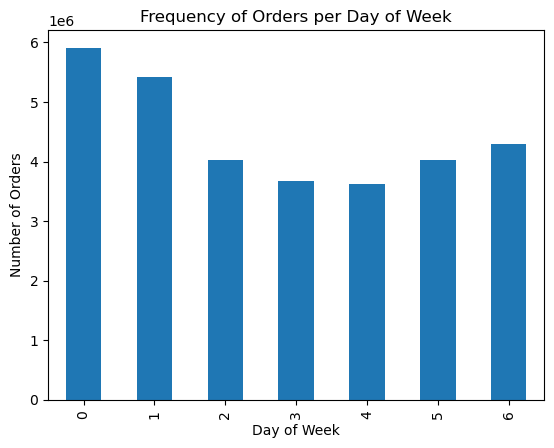

In [107]:
# Creating a bar chart for "orders_day_of_week" column by index order
bar_orders = df_keep['orders_day_of_week'].value_counts().sort_index().plot.bar()
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.title('Frequency of Orders per Day of Week')

In [108]:
# Exporting bar chart and saving it as an image in projects folder
bar_orders.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

### 08.2. Sales per Hour of Day

Text(0.5, 1.0, 'Expenditure per Hour of Day')

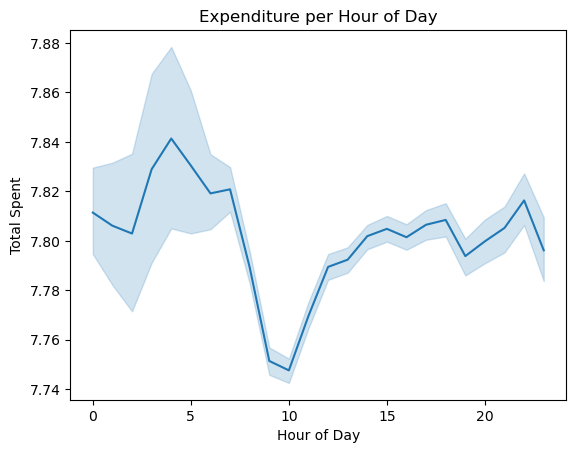

In [109]:
# Creating line chart to see expenditure per hour of day
line_hour = sns.lineplot(data = df_keep, x = 'order_hour_of_day', y = 'prices')
plt.xlabel('Hour of Day')
plt.ylabel('Total Spent')
plt.title('Expenditure per Hour of Day')

In [110]:
# Exporting saels per hour of day line chart and saving it as an image in projects folder
line_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_total_sales_hour.png'))

### 08.3. Orders by Department

#### 08.3.1. Combining Department Dataset

In [52]:
# Importing "departments_wrangled" dataset
dept = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','departments_wrangled.csv'))

In [53]:
# Checking "dept" dataframe
dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [54]:
# Renaming "Unnamed: 0" column to "department_id" to match main dataframe
dept.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [55]:
# Checking column name change
dept.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [56]:
# Checking "df_keep" dataframe shape before merging
df_keep.shape

(30964564, 34)

In [57]:
# Merging "dept" dataframe to "df_keep" dataframe in new dataframe "df_final"
df_final = df_keep.merge(dept, on = 'department_id', how = 'left', indicator = True)

In [59]:
# Checking merged dataframe "df_final"
df_final.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_label,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spending_flag,median_order_frequency,order_frequency_flag,gender,state,age,date_joined,n_dependents,fam_status,income,region,age_profile,income_profile,parent_profile,department,_merge
0,2539329,1,1,2,8,0.0,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Young Adult,Low,Young parent,beverages,both
1,2539329,1,1,2,8,0.0,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Young Adult,Low,Young parent,dairy eggs,both
2,2539329,1,1,2,8,0.0,12427,3,0,Original Beef Jerky,23,19,4.4,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Young Adult,Low,Young parent,snacks,both
3,2539329,1,1,2,8,0.0,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Young Adult,Low,Young parent,snacks,both
4,2539329,1,1,2,8,0.0,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,2019-02-17,3,married,40423,South,Young Adult,Low,Young parent,household,both


In [60]:
# Checking "df_final" shape
df_final.shape

(30964564, 36)

In [61]:
# Checking "_merge" frequency
df_final['_merge'].value_counts(dropna=False)

_merge
both          30964564
left_only            0
right_only           0
Name: count, dtype: int64

In [62]:
# Exporting merged "df_final" dataframe
df_final.to_pickle(os.path.join(path,'02 Data','Prepared Data','instacart_final.pkl'))

#### 08.3.2. Creating Visualization

C:\Users\jboer\AppData\Local\Temp\ipykernel_5868\2593048266.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Blues', 5) # Use 5 colors


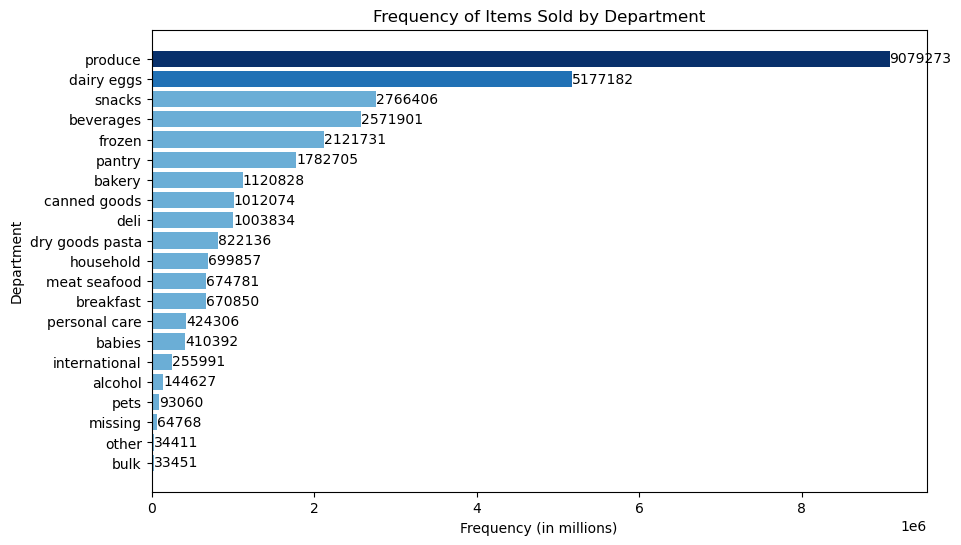

In [80]:
# Creating bar chart of frequency of purchases by department

# Calculate and sort the frequencies 
sorted_frequency = df_final['department'].value_counts().sort_values(ascending=True) 

# Create a custom colormap 
cmap = cm.get_cmap('Blues', 5) # Use 5 colors 
new_cmap = cm.colors.ListedColormap(cmap(np.linspace(0.4, 1, 5))) # Adjust the range

# Normalize the sorted frequency values 
norm = plt.Normalize(vmin=sorted_frequency.min(), vmax=sorted_frequency.max()) 

# Plotting the horizontal bar chart with gradient color from matplotlib.cm 
plt.figure(figsize=(10, 6))
bars_dept = plt.barh(sorted_frequency.index, sorted_frequency.values, color=new_cmap(norm(sorted_frequency.values))) 
plt.ylabel('Department') 
plt.xlabel('Frequency (in millions)') 
plt.title('Frequency of Items Sold by Department')

# Adding frequency labels on the bars 
for bar in bars_dept: 
    xval = bar.get_width() 
    plt.text(xval, bar.get_y() + bar.get_height()/2, int(xval), ha='left', va='center')

# Save the figure 
bars_dept_fig = plt.gcf() # Get the current figure

In [81]:
# Exporting orders by department bar chart and saving it as an image in projects folder
bars_dept_fig.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Task 4.10', 'bar_dept.png'))

### 08.4. Distribution of Orders by Loyalty

#### 08.4.1. Total Orders

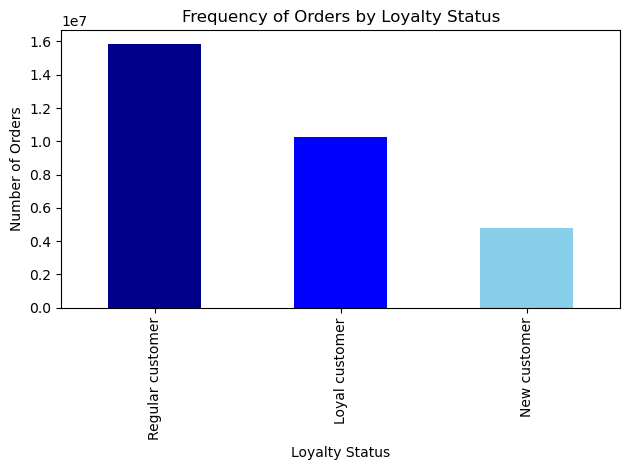

In [95]:
# Creating a bar chart for "loyalty_flag" column
bar_loyal = df_final['loyalty_flag'].value_counts().plot.bar(color = ['darkblue', 'blue', 'skyblue'])
plt.xlabel('Loyalty Status')
plt.ylabel('Number of Orders')
plt.title('Frequency of Orders by Loyalty Status')

# Adjust layout to ensure everything fits 
plt.tight_layout() 

# Save the figure with bounding box options 
bar_loyal_fig = plt.gcf()

In [96]:
# Exporting order frequency by loyalty bar chart and saving it as an image in projects folder
bar_loyal_fig.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Task 4.10', 'bar_loyal.png'))

#### 08.4.2. Days Since Last Order

In [88]:
# Aggregating data by "loyalty_flag" and calculating average number of days since prior order.
loyal_return = df_final.groupby('loyalty_flag')['days_since_prior_order'].mean()

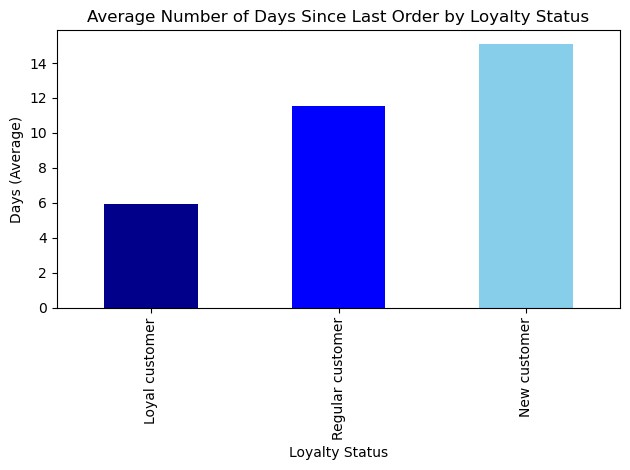

In [97]:
# Creating a bar chart for "loyalty_flag" column
bar_loyal_return = loyal_return.sort_values(ascending=True).plot.bar(color = ['darkblue', 'blue', 'skyblue'])
plt.xlabel('Loyalty Status')
plt.ylabel('Days (Average)')
plt.title('Average Number of Days Since Last Order by Loyalty Status')

# Adjust layout to ensure everything fits 
plt.tight_layout() 

# Save the figure with bounding box options 
bar_loyal_return_fig = plt.gcf()

In [98]:
# Exporting average return by loyalty bar chart and saving it as an image in projects folder
bar_loyal_return_fig.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Task 4.10', 'bar_loyal_return.png'))

#### 08.4.3. Average Spent

In [99]:
# Aggregating data by "loyalty_flag" and calculating average of price spent
avg_prices = df_final.groupby('loyalty_flag')['prices'].mean()

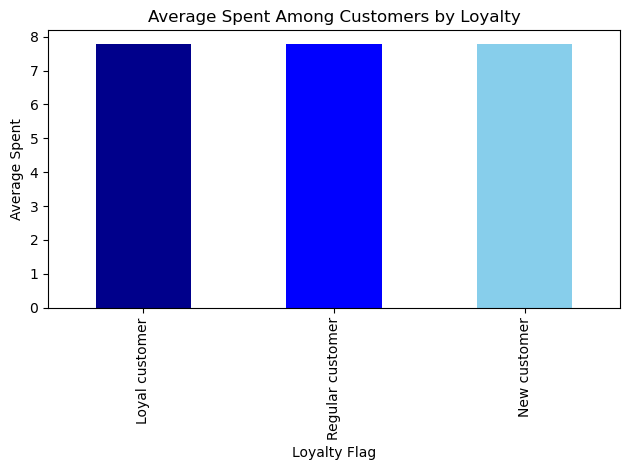

In [100]:
# Creating bar chart for average price spent based on loyalty
bar_loyal_avg = avg_prices.sort_values(ascending=True).plot.bar(color = ['darkblue', 'blue', 'skyblue'])
plt.xlabel('Loyalty Flag')
plt.ylabel('Average Spent')
plt.title('Average Spent Among Customers by Loyalty')

# Adjust layout to ensure everything fits 
plt.tight_layout() 

# Save the figure with bounding box options 
bar_loyal_avg_fig = plt.gcf()

In [105]:
# Exporting average orders by loyalty bar chart and saving it as an image in projects folder
bar_loyal_avg_fig.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Task 4.10', 'bar_loyal_avg.png'))

#### 08.4.4. Total Spent

In [102]:
# Aggregating data by "loyalty_flag" and calculating sum of price spent
sum_prices = df_final.groupby('loyalty_flag')['prices'].sum()

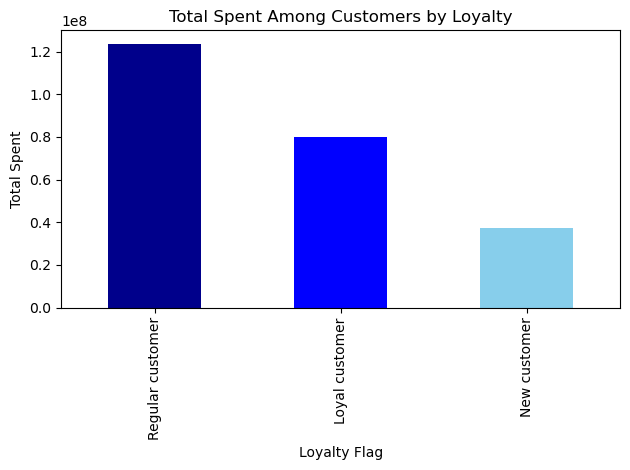

In [104]:
# Creating bar chart for sum of price based on loyalty
bar_loyal_sum = sum_prices.sort_values(ascending=False).plot.bar(color = ['darkblue', 'blue', 'skyblue'])
plt.xlabel('Loyalty Flag')
plt.ylabel('Total Spent')
plt.title('Total Spent Among Customers by Loyalty')

# Adjust layout to ensure everything fits 
plt.tight_layout() 

# Save the figure with bounding box options 
bar_loyal_sum_fig = plt.gcf()

In [106]:
# Exporting total orders by loyalty bar chart and saving it as an image in projects folder
bar_loyal_sum_fig.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Task 4.10', 'bar_loyal_sum.png'))

### 08.5. Ordering Habits based on Region

#### 08.5.1. Total Orders

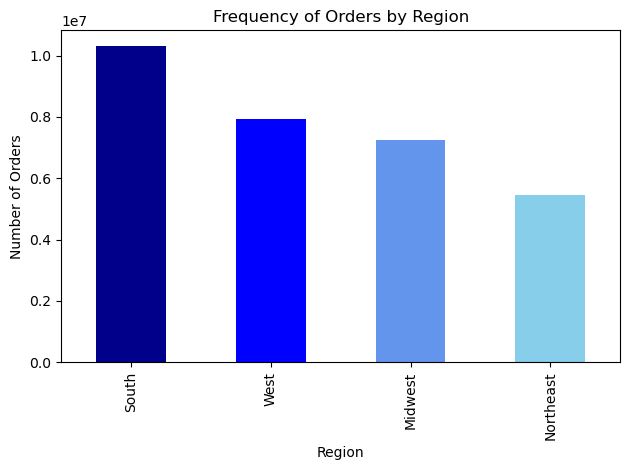

In [116]:
# Creating a frequency bar chart for "region" column
bar_region_freq = df_final['region'].value_counts().plot.bar(color = ['darkblue', 'blue', 'cornflowerblue', 'skyblue'])
plt.xlabel('Region')
plt.ylabel('Number of Orders')
plt.title('Frequency of Orders by Region')

# Adjust layout to ensure everything fits 
plt.tight_layout() 

# Save the figure with bounding box options 
bar_region_freq_fig = plt.gcf()

In [157]:
# Exporting orders by region bar chart and saving it as an image in projects folder
bar_region_freq_fig.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Task 4.10', 'bar_region_freq.png'))

#### 08.5.2. Total Spent

In [117]:
# Aggregating data by "region" and calculating sum of price spent
region_sum = df_final.groupby('region')['prices'].sum()

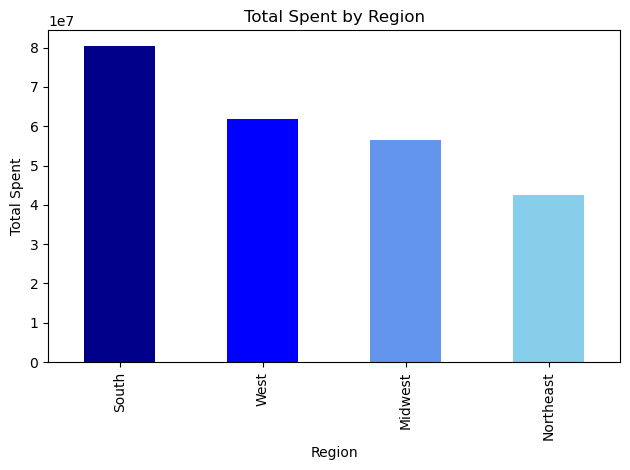

In [119]:
# Creating bar chart for sum of price based on region
bar_region_sum = region_sum.sort_values(ascending=False).plot.bar(color = ['darkblue', 'blue', 'cornflowerblue', 'skyblue'])
plt.xlabel('Region')
plt.ylabel('Total Spent')
plt.title('Total Spent by Region')

# Adjust layout to ensure everything fits 
plt.tight_layout() 

# Save the figure with bounding box options 
bar_region_sum_fig = plt.gcf()

In [158]:
# Exporting total spent by region bar chart and saving it as an image in projects folder
bar_region_sum_fig.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Task 4.10', 'bar_region_sum.png'))

#### 08.5.3. Age Group Distribution

In [120]:
# Creating crosstab of "region" and "age_profile"
crosstab_region_age = pd.crosstab(df_final['region'], df_final['age_profile'],dropna = False)

In [138]:
# Checking "crosstab_region_age"
print(crosstab_region_age)

age_profile  Middle Adult  Older Adult   Senior  Young Adult
region                                                      
Midwest           1854288      1699665  1904046      1803514
Northeast         1363436      1248575  1484807      1367867
South             2593671      2393307  2708461      2615700
West              1979429      1879184  2098230      1970384


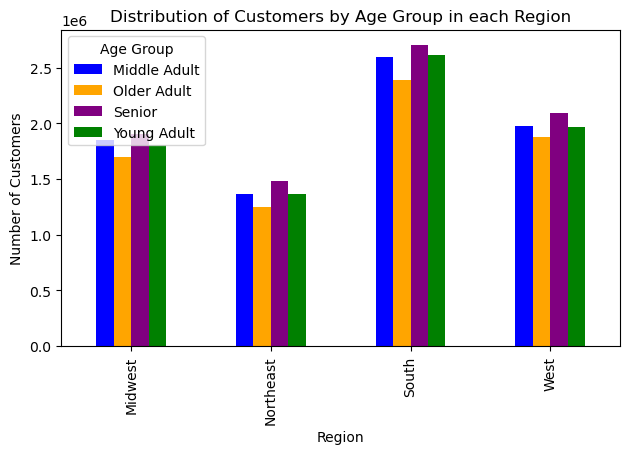

In [150]:
# Creating a bar chart of "crosstab_region_age"
bar_region_age = crosstab_region_age.plot.bar(color = ['blue', 'orange', 'purple', 'green'])
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers by Age Group in each Region')
plt.legend(title="Age Group", loc='upper left')

# Adjust layout to ensure everything fits 
plt.tight_layout() 

# Save the figure with bounding box options 
bar_region_age_fig = plt.gcf()

In [159]:
# Exporting age by region bar chart and saving it as an image in projects folder
bar_region_age_fig.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Task 4.10', 'bar_region_age.png'))

#### 08.5.4. Parent Group Distribution

In [141]:
# Creating crosstab of "region" and "parent_profile"
crosstab_region_parent = pd.crosstab(df_final['region'], df_final['parent_profile'],dropna = False)

In [142]:
# Checking "crosstab_region_parent"
print(crosstab_region_parent)

parent_profile  Not a parent   Parent  Young parent
region                                             
Midwest              1822816  4073462       1365235
Northeast            1354482  3097219       1012984
South                2581933  5773762       1955444
West                 1980450  4462674       1484103


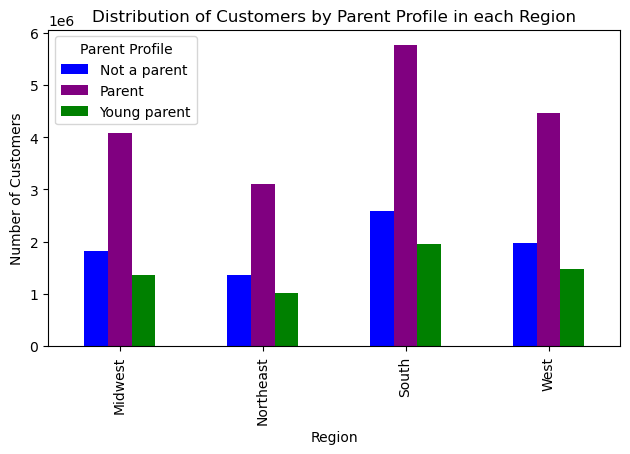

In [154]:
# Creating a bar chart of "crosstab_region_parent"
bar_region_parent = crosstab_region_parent.plot.bar(color = ['blue', 'purple', 'green'])
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers by Parent Profile in each Region')
plt.legend(title="Parent Profile")

# Adjust layout to ensure everything fits 
plt.tight_layout() 

# Save the figure with bounding box options 
bar_region_parent_fig = plt.gcf()

In [160]:
# Exporting parents by region bar chart and saving it as an image in projects folder
bar_region_parent_fig.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Task 4.10', 'bar_region_parent.png'))

#### 08.5.5. Income Group Distribution

In [152]:
# Creating crosstab of "region" and "income_profile"
crosstab_region_income = pd.crosstab(df_final['region'], df_final['income_profile'],dropna = False)

In [153]:
# Checking "crosstab_region_income"
print(crosstab_region_income)

income_profile     High      Low   Middle
region                                   
Midwest         2188923  1639364  3433226
Northeast       1628878  1247015  2588792
South           3023406  2392126  4895607
West            2338306  1829332  3759589


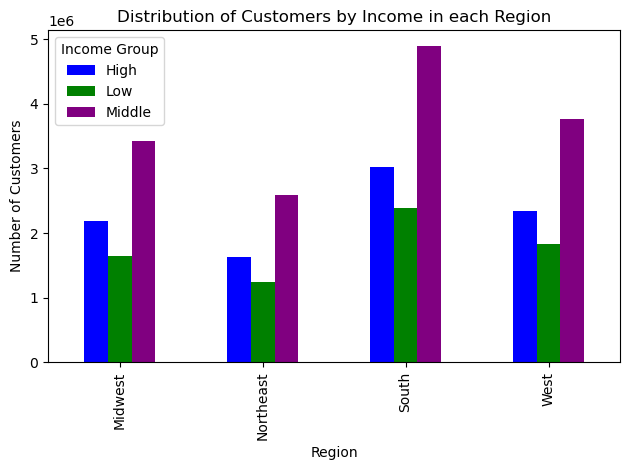

In [156]:
# Creating a bar chart of "crosstab_region_income"
bar_region_income = crosstab_region_income.plot.bar(color = ['blue', 'green', 'purple'])
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers by Income in each Region')
plt.legend(title="Income Group")

# Adjust layout to ensure everything fits 
plt.tight_layout() 

# Save the figure with bounding box options 
bar_region_income_fig = plt.gcf()

In [161]:
# Exporting income by region bar chart and saving it as an image in projects folder
bar_region_income_fig.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Task 4.10', 'bar_region_income.png'))

### 08.6. Age vs. Family Status Ordering Habits

#### 08.6.1. Total Spent

In [186]:
# Aggregating data by "fam_status" and "age_profile" and calculating sum of price spent
sum_prices_fam_age = df_final.groupby(['fam_status', 'age_profile'])['prices'].sum().unstack(fill_value=0)

In [173]:
# Checking "sum_prices_fam_age"
print(sum_prices_fam_age)

age_profile                       Middle Adult  Older Adult      Senior  \
fam_status                                                                
divorced/widowed                           0.0    4860146.5  15773749.2   
living with parents and siblings           0.0          0.0         0.0   
married                             45640007.7   41873588.0  48119054.9   
single                              15072209.6    9489281.5         0.0   

age_profile                       Young Adult  
fam_status                                     
divorced/widowed                          0.0  
living with parents and siblings   11553202.6  
married                            33741760.3  
single                             15088174.0  


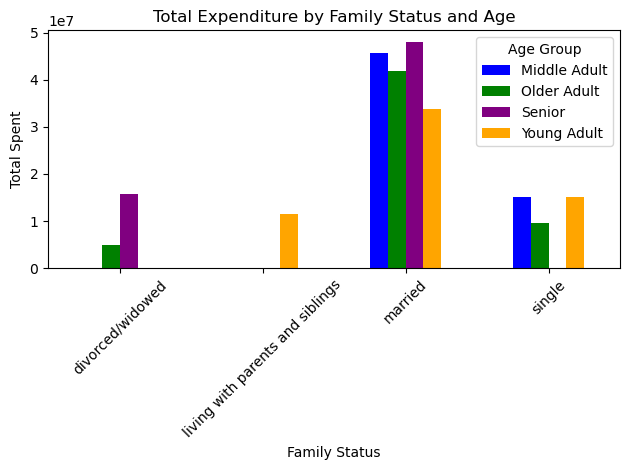

In [178]:
# Creating a bar chart of total expenditure by family status and age
bar_fam_age_sum = sum_prices_fam_age.plot.bar(color = ['blue', 'green', 'purple',  'orange'])
plt.xlabel('Family Status')
plt.ylabel('Total Spent')
plt.xticks(rotation=45)
plt.title('Total Expenditure by Family Status and Age')
plt.legend(title="Age Group")

# Adjust layout to ensure everything fits 
plt.tight_layout() 

# Save the figure with bounding box options 
bar_fam_age_sum_fig = plt.gcf()

In [191]:
# Exporting expenditure by fam_status and age bar chart and saving it as an image in projects folder
bar_fam_age_sum_fig.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Task 4.10', 'bar_fam_age_sum.png'))

#### 08.6.2. Total Orders

In [184]:
# Aggregating data by "fam_status" and "age_profile" and calculating total orders
fam_age_freq = df_final.groupby(['fam_status', 'age_profile'])['max_order'].count().unstack(fill_value=0)

In [181]:
# Checking "fam_age_freq"
print(fam_age_freq)

age_profile                       Middle Adult  Older Adult   Senior  \
fam_status                                                             
divorced/widowed                             0       623313  2021958   
living with parents and siblings             0            0        0   
married                                5856214      5377317  6173586   
single                                 1934610      1220101        0   

age_profile                       Young Adult  
fam_status                                     
divorced/widowed                            0  
living with parents and siblings      1481172  
married                               4336594  
single                                1939699  


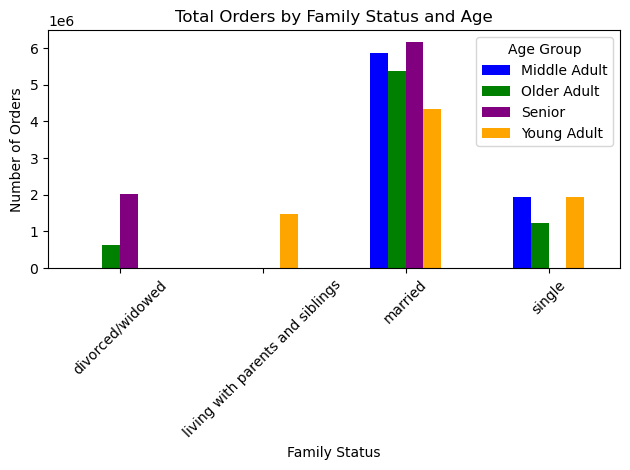

In [182]:
# Creating a bar chart of order frequency by family status and age
bar_fam_age_freq = fam_age_freq.plot.bar(color = ['blue', 'green', 'purple',  'orange'])
plt.xlabel('Family Status')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.title('Total Orders by Family Status and Age')
plt.legend(title="Age Group")

# Adjust layout to ensure everything fits 
plt.tight_layout() 

# Save the figure with bounding box options 
bar_fam_age_freq_fig = plt.gcf()

In [192]:
# Exporting total orders by fam_status and age bar chart and saving it as an image in projects folder
bar_fam_age_freq_fig.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Task 4.10', 'bar_fam_age_freq.png'))

#### 08.6.3. Days Since Last Order

In [188]:
# Aggregating data by "fam_status" and "age_profile" and calculating avg of days since prior order
fam_age_reorder = df_final.groupby(['fam_status', 'age_profile'])['days_since_prior_order'].mean().unstack(fill_value=0)

In [189]:
# Checking "fam_age_reorder"
print(fam_age_reorder)

age_profile                       Middle Adult  Older Adult     Senior  \
fam_status                                                               
divorced/widowed                      0.000000    10.129328  10.191263   
living with parents and siblings      0.000000     0.000000   0.000000   
married                              10.181685    10.307866  10.217605   
single                               10.249294    10.087398   0.000000   

age_profile                       Young Adult  
fam_status                                     
divorced/widowed                     0.000000  
living with parents and siblings    10.181062  
married                             10.264620  
single                              10.307651  


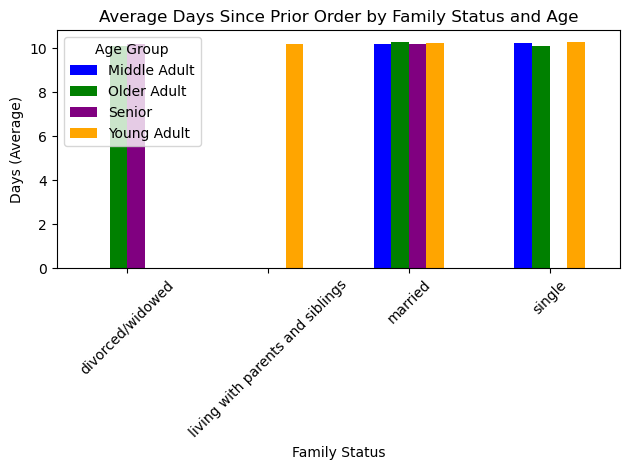

In [190]:
# Creating a bar chart of order frequency by family status and age
bar_fam_age_reorder = fam_age_reorder.plot.bar(color = ['blue', 'green', 'purple',  'orange'])
plt.xlabel('Family Status')
plt.ylabel('Days (Average)')
plt.xticks(rotation=45)
plt.title('Average Days Since Prior Order by Family Status and Age')
plt.legend(title="Age Group")

# Adjust layout to ensure everything fits 
plt.tight_layout() 

# Save the figure with bounding box options 
bar_fam_age_reorder_fig = plt.gcf()

In [193]:
# Exporting days since prior order by fam_status and age bar chart and saving it as an image in projects folder
bar_fam_age_reorder_fig.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Task 4.10', 'bar_fam_age_reorder.png'))

### 08.7. Demographic Classifications

#### 08.7.1a. Age Group Percentage

(-1.0999997787643638,
 1.0999999894649697,
 -1.099999758404672,
 1.0999997707577946)

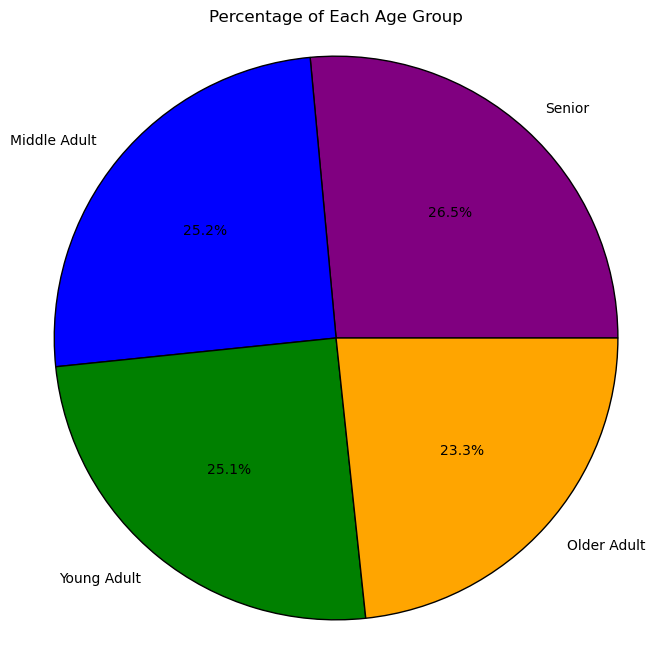

In [265]:
# Calculate the frequency of each age group 
age_group_counts = df_final['age_profile'].value_counts() 

# Calculate the percentage of each age group 
age_group_percentages = (age_group_counts / age_group_counts.sum()) * 100 

# Plot the pie chart 
age_percent = plt.figure(figsize=(8, 8)) 
plt.pie(age_group_percentages, labels=age_group_percentages.index, colors=['purple', 'blue', 'green', 'orange'], autopct='%1.1f%%', startangle=0, wedgeprops={'edgecolor':'black'}) 
plt.title('Percentage of Each Age Group') 

# Equal aspect ratio ensures that pie is drawn as a circle. 
plt.axis('equal')

In [266]:
# Exporting age group percentage and saving it as an image in projects folder
age_percent.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Task 4.10', 'age_percent.png'))

#### 08.7.1b. Age Group vs. Parent Group

In [200]:
# Creating crosstab of "age_profile" and "parent_profile"
crosstab_age_parent = pd.crosstab(df_final['age_profile'], df_final['parent_profile'],dropna = False)

In [201]:
# Checking "crosstab_age_parent"
print(crosstab_age_parent)

parent_profile  Not a parent   Parent  Young parent
age_profile                                        
Middle Adult         1934610  5856214             0
Older Adult          1843414  5377317             0
Senior               2021958  6173586             0
Young Adult          1939699        0       5817766


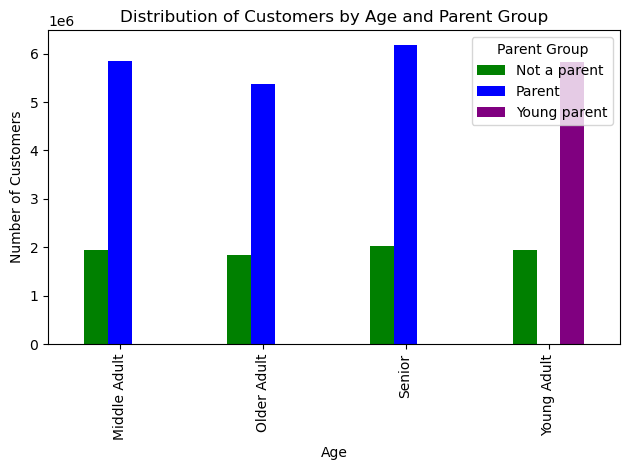

In [264]:
# Creating a bar chart of "crosstab_age_parent"
bar_age_parent = crosstab_age_parent.plot.bar(color = ['green', 'blue', 'purple'])
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers by Age and Parent Group')
plt.legend(title="Parent Group")

# Adjust layout to ensure everything fits 
plt.tight_layout() 

# Save the figure with bounding box options 
bar_age_parent_fig = plt.gcf()

In [268]:
# Exporting age vs parent bar chart and saving it as an image in projects folder
bar_age_parent_fig.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Task 4.10', 'bar_age_parent.png'))

#### 08.7.1c. Age Group vs. Income Group

In [224]:
# Creating crosstab of "age_profile" and "income_profile"
crosstab_age_income = pd.crosstab(df_final['age_profile'], df_final['income_profile'],dropna = False)
print(crosstab_age_income)

income_profile     High      Low   Middle
age_profile                              
Middle Adult    2065499  1944042  3781283
Older Adult     3296581   905541  3018609
Senior          3727051   995827  3472666
Young Adult       90382  3262427  4404656


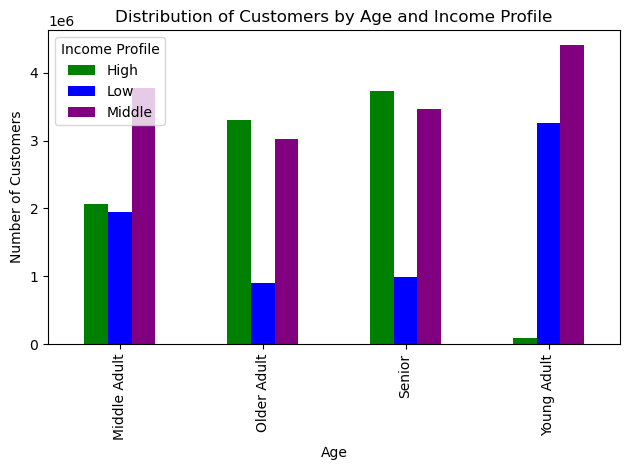

In [205]:
# Creating a bar chart of "crosstab_age_income"
bar_age_income = crosstab_age_income.plot.bar(color = ['green', 'blue', 'purple'])
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers by Age and Income Profile')
plt.legend(title="Income Profile")

# Adjust layout to ensure everything fits 
plt.tight_layout() 

# Save the figure with bounding box options 
bar_age_income_fig = plt.gcf()

In [269]:
# Exporting age vs income bar chart and saving it as an image in projects folder
bar_age_income_fig.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Task 4.10', 'bar_age_income.png'))

#### 08.7.1d. Age Group vs. Loyalty Group

In [206]:
# Creating crosstab of "age_profile" and "loyalty_flag"
crosstab_age_loyal = pd.crosstab(df_final['age_profile'], df_final['loyalty_flag'],dropna = False)
print(crosstab_age_loyal)

loyalty_flag  Loyal customer  New customer  Regular customer
age_profile                                                 
Middle Adult         2612642       1183319           3994863
Older Adult          2408384       1134601           3677746
Senior               2723958       1276659           4194927
Young Adult          2539109       1209116           4009240


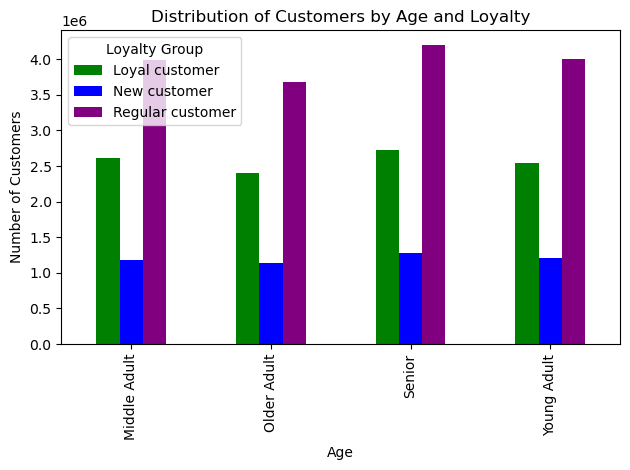

In [214]:
# Creating a bar chart of "crosstab_age_loyal"
bar_age_loyal = crosstab_age_loyal.plot.bar(color = ['green', 'blue', 'purple'])
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers by Age and Loyalty')
plt.legend(title="Loyalty Group")
         
# Adjust layout to ensure everything fits 
plt.tight_layout() 

# Save the figure with bounding box options 
bar_age_loyal_fig = plt.gcf()

In [270]:
# Exporting age vs loyalty bar chart and saving it as an image in projects folder
bar_age_loyal_fig.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Task 4.10', 'bar_age_loyal.png'))

#### 08.7.2a. Income Group Percentage

(-1.0999882973560422, 1.099999409205417, -1.09999936336855, 1.0999959313436274)

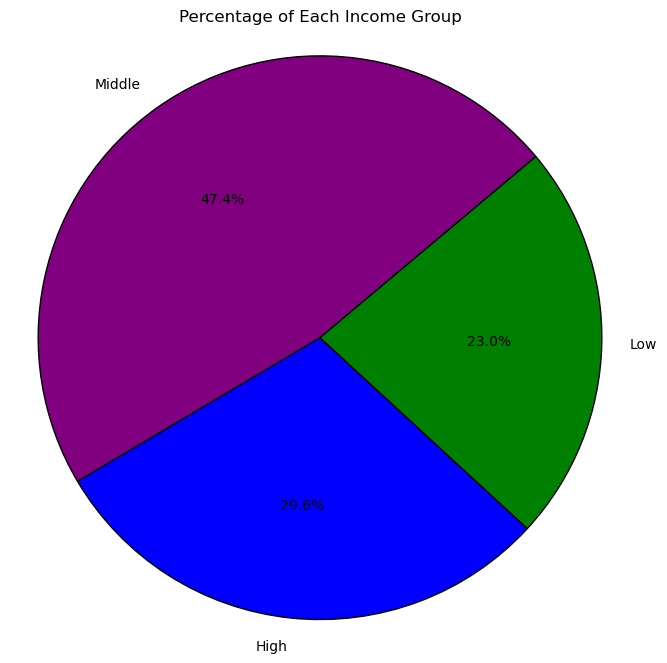

In [271]:
# Calculate the frequency of each income group 
income_group_counts = df_final['income_profile'].value_counts() 

# Calculate the percentage of each income group 
income_group_percentages = (income_group_counts / income_group_counts.sum()) * 100 

# Plot the pie chart 
income_percent = plt.figure(figsize=(8, 8)) 
plt.pie(income_group_percentages, labels=income_group_percentages.index, colors=['purple', 'blue', 'green'], autopct='%1.1f%%', startangle=40, wedgeprops={'edgecolor':'black'}) 
plt.title('Percentage of Each Income Group') 

# Equal aspect ratio ensures that pie is drawn as a circle. 
plt.axis('equal')

In [272]:
# Exporting income group percentage and saving it as an image in projects folder
income_percent.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Task 4.10', 'income_percent.png'))

#### 08.7.2b. Income Group vs. Parent Group

In [225]:
# Creating crosstab of "income_profile" and "parent_profile"
crosstab_income_parent = pd.crosstab(df_final['income_profile'], df_final['parent_profile'],dropna = False)
print(crosstab_income_parent)

parent_profile  Not a parent   Parent  Young parent
income_profile                                     
High                 2321506  6788538         69469
Low                  1777121  2888040       2442676
Middle               3641054  7730539       3305621


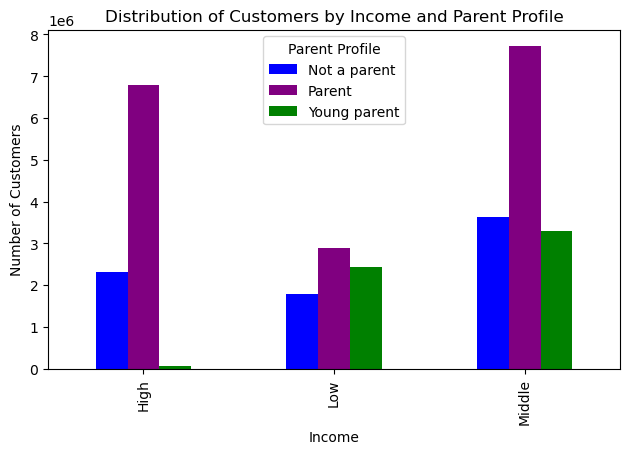

In [227]:
# Creating a bar chart of "crosstab_income_parent"
bar_income_parent = crosstab_income_parent.plot.bar(color = ['blue', 'purple', 'green'])
plt.xlabel('Income')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers by Income and Parent Profile')
plt.legend(title="Parent Profile")

# Adjust layout to ensure everything fits 
plt.tight_layout() 

# Save the figure with bounding box options 
bar_income_parent_fig = plt.gcf()

In [275]:
# Exporting income vs parent group bar chart and saving it as an image in projects folder
bar_income_parent_fig.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Task 4.10', 'bar_income_parent.png'))

#### 08.7.2c. Income Group vs. Loyalty Group

In [228]:
# Creating crosstab of "income_profile" and "loyalty_flag"
crosstab_income_loyal = pd.crosstab(df_final['income_profile'], df_final['loyalty_flag'],dropna = False)
print(crosstab_income_loyal)

loyalty_flag    Loyal customer  New customer  Regular customer
income_profile                                                
High                   3061952       1392475           4725086
Low                    2287936       1214366           3605535
Middle                 4934205       2196854           7546155


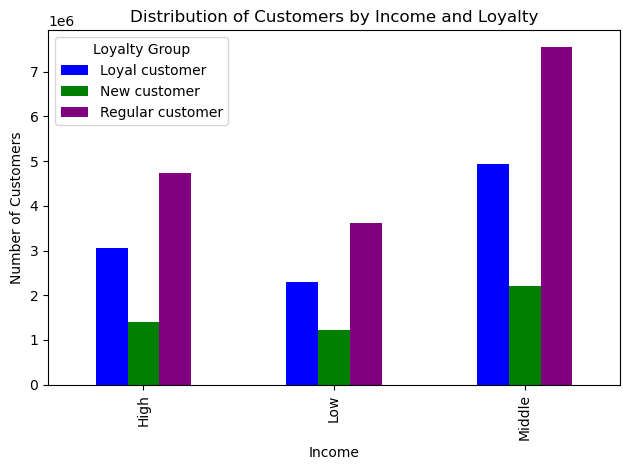

In [230]:
# Creating a bar chart of "crosstab_income_loyal"
bar_income_loyal = crosstab_income_loyal.plot.bar(color = ['blue', 'green', 'purple'])
plt.xlabel('Income')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers by Income and Loyalty')
plt.legend(title="Loyalty Group")
         
# Adjust layout to ensure everything fits 
plt.tight_layout() 

# Save the figure with bounding box options 
bar_income_loyal_fig = plt.gcf()

In [276]:
# Exporting income vs loyalty bar chart and saving it as an image in projects folder
bar_income_loyal_fig.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Task 4.10', 'bar_income_loyal.png'))

#### 08.7.3a. Parent Group Percentage

(-1.0999990029563458,
 1.099998797083493,
 -1.0999739607981849,
 1.0999987593084444)

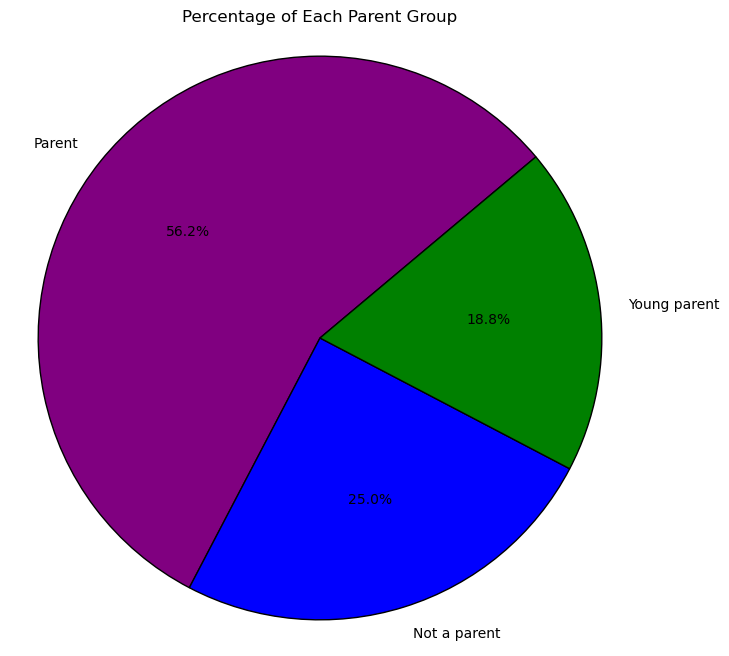

In [273]:
# Calculate the frequency of each parent group 
parent_group_counts = df_final['parent_profile'].value_counts() 

# Calculate the percentage of each parent group 
parent_group_percentages = (parent_group_counts / parent_group_counts.sum()) * 100 

# Plot the pie chart 
parent_percent = plt.figure(figsize=(8, 8)) 
plt.pie(parent_group_percentages, labels=parent_group_percentages.index, colors=['purple', 'blue', 'green'], autopct='%1.1f%%', startangle=40, wedgeprops={'edgecolor':'black'}) 
plt.title('Percentage of Each Parent Group') 

# Equal aspect ratio ensures that pie is drawn as a circle. 
plt.axis('equal')

In [274]:
# Exporting parent group percentage and saving it as an image in projects folder
parent_percent.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Task 4.10', 'parent_percent.png'))

#### 08.7.3b. Parent Group vs. Loyalty Group

In [232]:
# Creating crosstab of "parent_profile" and "loyalty_flag"
crosstab_parent_loyal = pd.crosstab(df_final['parent_profile'], df_final['loyalty_flag'],dropna = False)
print(crosstab_parent_loyal)

loyalty_flag    Loyal customer  New customer  Regular customer
parent_profile                                                
Not a parent           2588844       1201265           3949572
Parent                 5788930       2704794           8913393
Young parent           1906319        897636           3013811


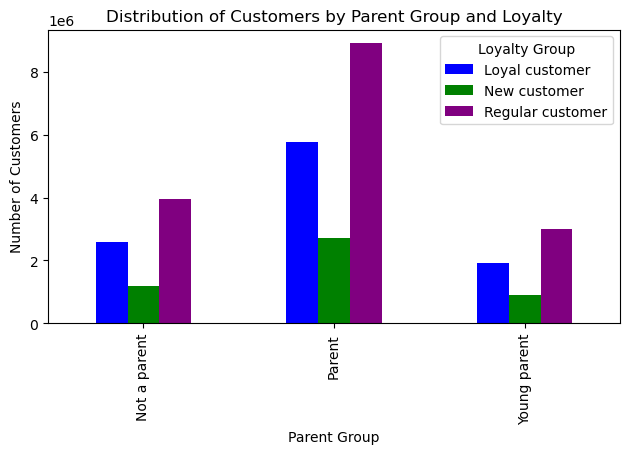

In [233]:
# Creating a bar chart of "crosstab_parent_loyal"
bar_parent_loyal = crosstab_parent_loyal.plot.bar(color = ['blue', 'green', 'purple'])
plt.xlabel('Parent Group')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers by Parent Group and Loyalty')
plt.legend(title="Loyalty Group")
         
# Adjust layout to ensure everything fits 
plt.tight_layout() 

# Save the figure with bounding box options 
bar_parent_loyal_fig = plt.gcf()

In [277]:
# Exporting parent group vs loyalty bar chart and saving it as an image in projects folder
bar_parent_loyal_fig.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Task 4.10', 'bar_parent_loyal.png'))

#### 08.7.4a. Departments vs. Age Group

In [234]:
# Creating crosstab of "department" and "age_profile"
crosstab_dept_age = pd.crosstab(df_final['department'], df_final['age_profile'],dropna = False)

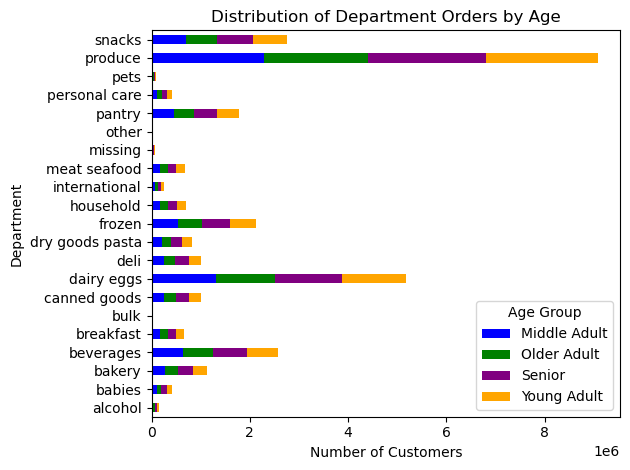

In [236]:
# Creating a bar chart of "crosstab_dept_age"
bar_dept_age = crosstab_dept_age.plot.barh(stacked=True, color = ['blue', 'green', 'purple', 'orange'])
plt.xlabel('Number of Customers')
plt.ylabel('Department')
plt.title('Distribution of Department Orders by Age')
plt.legend(title="Age Group")
         
# Adjust layout to ensure everything fits 
plt.tight_layout() 

# Save the figure with bounding box options 
bar_dept_age_fig = plt.gcf()

In [278]:
# Exporting department vs age bar chart and saving it as an image in projects folder
bar_dept_age_fig.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Task 4.10', 'bar_dept_age.png'))

#### 08.7.4b. Departments vs. Income Group

In [237]:
# Creating crosstab of "department" and "income_profile"
crosstab_dept_income = pd.crosstab(df_final['department'], df_final['income_profile'],dropna = False)

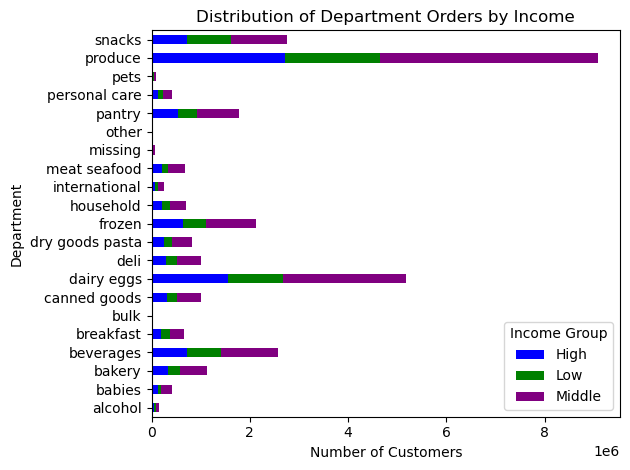

In [239]:
# Creating a bar chart of "crosstab_dept_income"
bar_dept_income = crosstab_dept_income.plot.barh(stacked=True, color = ['blue', 'green', 'purple'])
plt.xlabel('Number of Customers')
plt.ylabel('Department')
plt.title('Distribution of Department Orders by Income')
plt.legend(title="Income Group")
         
# Adjust layout to ensure everything fits 
plt.tight_layout() 

# Save the figure with bounding box options 
bar_dept_income_fig = plt.gcf()

In [279]:
# Exporting department vs income bar chart and saving it as an image in projects folder
bar_dept_income_fig.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Task 4.10', 'bar_dept_income.png'))

#### 08.7.4c. Departments vs. Parent Group

In [240]:
# Creating crosstab of "department" and "parent_profile"
crosstab_dept_parent = pd.crosstab(df_final['department'], df_final['parent_profile'],dropna = False)

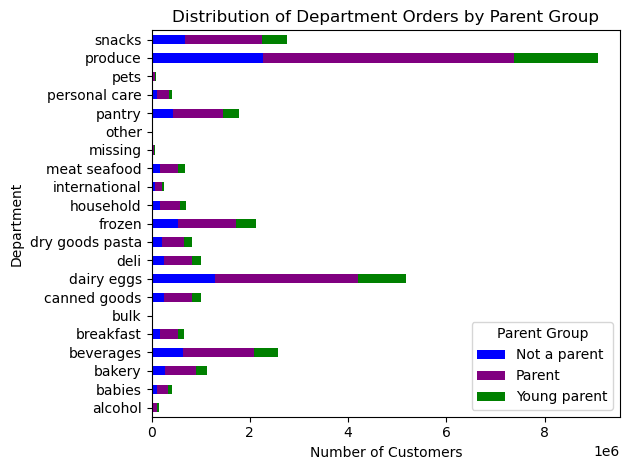

In [242]:
# Creating a bar chart of "crosstab_dept_parent"
bar_dept_parent = crosstab_dept_parent.plot.barh(stacked=True, color = ['blue', 'purple', 'green'])
plt.xlabel('Number of Customers')
plt.ylabel('Department')
plt.title('Distribution of Department Orders by Parent Group')
plt.legend(title="Parent Group")
         
# Adjust layout to ensure everything fits 
plt.tight_layout() 

# Save the figure with bounding box options 
bar_dept_parent_fig = plt.gcf()

In [280]:
# Exporting department vs parent bar chart and saving it as an image in projects folder
bar_dept_parent_fig.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Task 4.10', 'bar_dept_parent.png'))

#### 08.7.4d. Departments vs. Loyalty Group

In [243]:
# Creating crosstab of "department" and "loyalty_flag"
crosstab_dept_loyal = pd.crosstab(df_final['department'], df_final['loyalty_flag'],dropna = False)

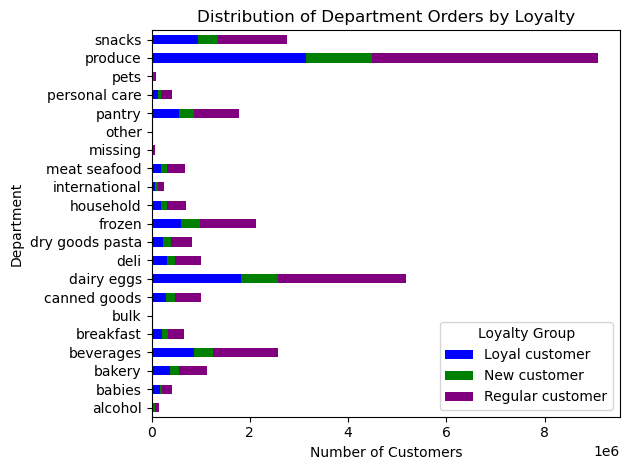

In [244]:
# Creating a bar chart of "crosstab_dept_loyal"
bar_dept_loyal = crosstab_dept_loyal.plot.barh(stacked=True, color = ['blue', 'green', 'purple'])
plt.xlabel('Number of Customers')
plt.ylabel('Department')
plt.title('Distribution of Department Orders by Loyalty')
plt.legend(title="Loyalty Group")
         
# Adjust layout to ensure everything fits 
plt.tight_layout() 

# Save the figure with bounding box options 
bar_dept_loyal_fig = plt.gcf()

In [281]:
# Exporting department vs loyalty bar chart and saving it as an image in projects folder
bar_dept_loyal_fig.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Task 4.10', 'bar_dept_loyal.png'))

### 08.8. Ordering Habits by Customer Profiles

#### 08.8.1a. Age Group vs. Order Frequency

In [245]:
# Creating crosstab of "age_profile" and "order_frequency_flag"
crosstab_age_ord_freq = pd.crosstab(df_final['age_profile'], df_final['order_frequency_flag'],dropna = False)
print(crosstab_age_ord_freq)

order_frequency_flag  Frequent customer  Non-frequent customer  \
age_profile                                                      
Middle Adult                    5589315                 551430   
Older Adult                     5168175                 511783   
Senior                          5895127                 574400   
Young Adult                     5556277                 549804   

order_frequency_flag  Regular customer  
age_profile                             
Middle Adult                   1650079  
Older Adult                    1540773  
Senior                         1726017  
Young Adult                    1651384  


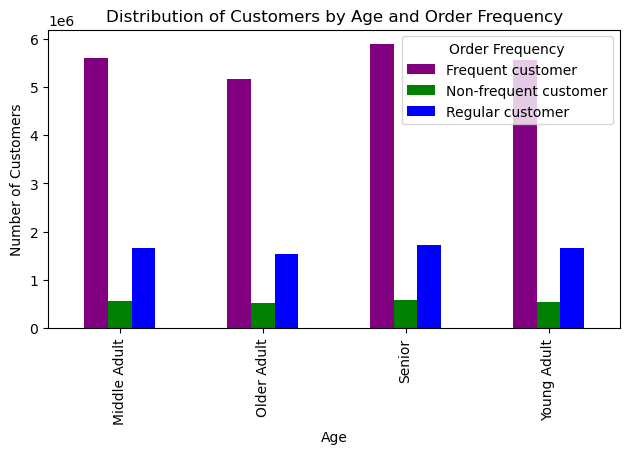

In [246]:
# Creating a bar chart of "crosstab_age_ord_freq"
bar_age_ord_freq = crosstab_age_ord_freq.plot.bar(color = ['purple', 'green', 'blue'])
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers by Age and Order Frequency')
plt.legend(title="Order Frequency")
         
# Adjust layout to ensure everything fits 
plt.tight_layout() 

# Save the figure with bounding box options 
bar_age_ord_freq_fig = plt.gcf()

In [282]:
# Exporting age group vs order frequency bar chart and saving it as an image in projects folder
bar_age_ord_freq_fig.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Task 4.10', 'bar_age_ord_freq.png'))

#### 08.8.1b. Income Group vs. Order Frequency

In [247]:
# Creating crosstab of "income_profile" and "order_frequency_flag"
crosstab_income_ord_freq = pd.crosstab(df_final['income_profile'], df_final['order_frequency_flag'],dropna = False)
print(crosstab_income_ord_freq)

order_frequency_flag  Frequent customer  Non-frequent customer  \
income_profile                                                   
High                            6624653                 620474   
Low                             5008706                 564624   
Middle                         10575535                1002319   

order_frequency_flag  Regular customer  
income_profile                          
High                           1934386  
Low                            1534507  
Middle                         3099360  


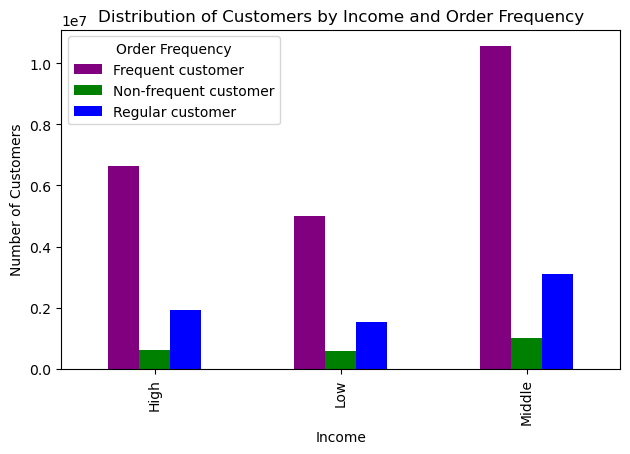

In [248]:
# Creating a bar chart of "crosstab_income_ord_freq"
bar_income_ord_freq = crosstab_income_ord_freq.plot.bar(color = ['purple', 'green', 'blue'])
plt.xlabel('Income')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers by Income and Order Frequency')
plt.legend(title="Order Frequency")
         
# Adjust layout to ensure everything fits 
plt.tight_layout() 

# Save the figure with bounding box options 
bar_income_ord_freq_fig = plt.gcf()

In [283]:
# Exporting income group vs order frequency bar chart and saving it as an image in projects folder
bar_income_ord_freq_fig.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Task 4.10', 'bar_income_ord_freq.png'))

#### 08.8.1c. Parent Group vs. Order Frequency

In [249]:
# Creating crosstab of "parent_profile" and "order_frequency_flag"
crosstab_parent_ord_freq = pd.crosstab(df_final['parent_profile'], df_final['order_frequency_flag'],dropna = False)
print(crosstab_parent_ord_freq)

order_frequency_flag  Frequent customer  Non-frequent customer  \
parent_profile                                                   
Not a parent                    5544082                 540110   
Parent                         12491961                1232942   
Young parent                    4172851                 414365   

order_frequency_flag  Regular customer  
parent_profile                          
Not a parent                   1655489  
Parent                         3682214  
Young parent                   1230550  


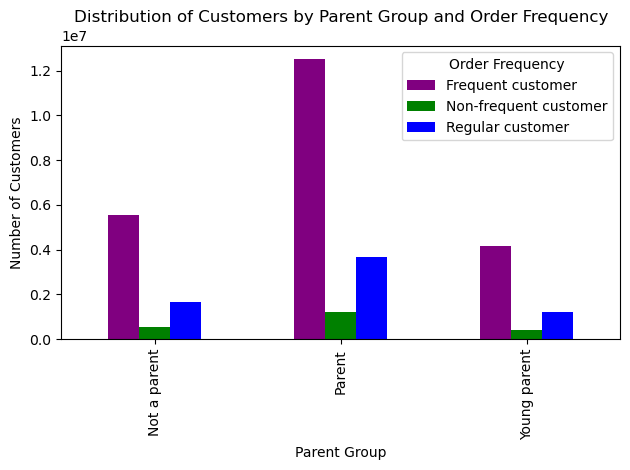

In [250]:
# Creating a bar chart of "crosstab_parent_ord_freq"
bar_parent_ord_freq = crosstab_parent_ord_freq.plot.bar(color = ['purple', 'green', 'blue'])
plt.xlabel('Parent Group')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers by Parent Group and Order Frequency')
plt.legend(title="Order Frequency")
         
# Adjust layout to ensure everything fits 
plt.tight_layout() 

# Save the figure with bounding box options 
bar_parent_ord_freq_fig = plt.gcf()

In [284]:
# Exporting parent group vs order frequency bar chart and saving it as an image in projects folder
bar_parent_ord_freq_fig.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Task 4.10', 'bar_parent_ord_freq.png'))

#### 08.8.1d. Region vs. Order Frequency

In [251]:
# Creating crosstab of "region" and "order_frequency_flag"
crosstab_region_ord_freq = pd.crosstab(df_final['region'], df_final['order_frequency_flag'],dropna = False)
print(crosstab_region_ord_freq)

order_frequency_flag  Frequent customer  Non-frequent customer  \
region                                                           
Midwest                         5166753                 523619   
Northeast                       3919693                 379091   
South                           7407676                 732373   
West                            5714772                 552334   

order_frequency_flag  Regular customer  
region                                  
Midwest                        1571141  
Northeast                      1165901  
South                          2171090  
West                           1660121  


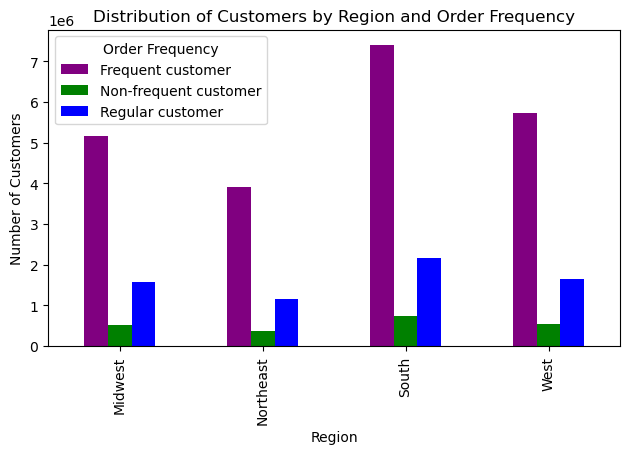

In [252]:
# Creating a bar chart of "crosstab_region_ord_freq"
bar_region_ord_freq = crosstab_region_ord_freq.plot.bar(color = ['purple', 'green', 'blue'])
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers by Region and Order Frequency')
plt.legend(title="Order Frequency")
         
# Adjust layout to ensure everything fits 
plt.tight_layout() 

# Save the figure with bounding box options 
bar_region_ord_freq_fig = plt.gcf()

In [285]:
# Exporting region vs order frequency bar chart and saving it as an image in projects folder
bar_region_ord_freq_fig.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Task 4.10', 'bar_region_ord_freq.png'))

#### 08.8.2a. Total Expenditure by Age Group

In [253]:
# Aggregating data by "age" and calculating sum of price spent
age_sum = df_final.groupby('age_profile')['prices'].sum()

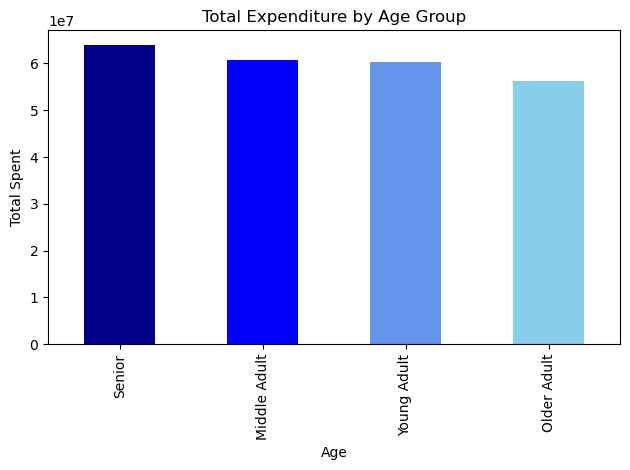

In [286]:
# Creating a bar chart of "age_sum"
bar_age_sum = age_sum.sort_values(ascending=False).plot.bar(color = ['darkblue', 'blue', 'cornflowerblue', 'skyblue'])
plt.xlabel('Age')
plt.ylabel('Total Spent')
plt.title('Total Expenditure by Age Group')
         
# Adjust layout to ensure everything fits 
plt.tight_layout() 

# Save the figure with bounding box options 
bar_age_sum_fig = plt.gcf()

In [287]:
# Exporting total spent by age group bar chart and saving it as an image in projects folder
bar_age_sum_fig.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Task 4.10', 'bar_age_sum.png'))

#### 08.8.2b. Total Expenditure by Income Group

In [259]:
# Aggregating data by "income" and calculating sum of price spent
income_sum = df_final.groupby('income_profile')['prices'].sum()

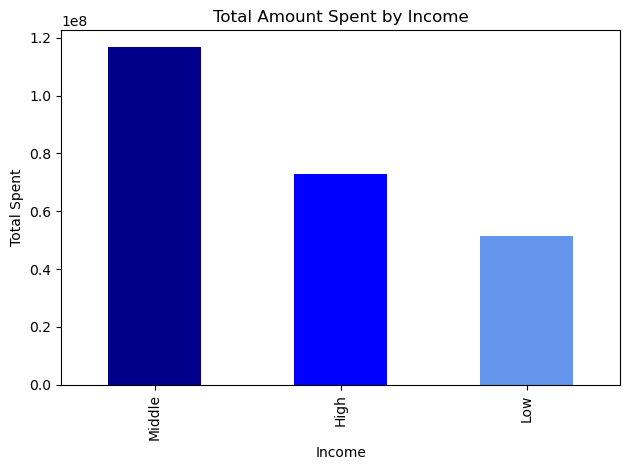

In [260]:
# Creating a bar chart of "income_sum"
bar_income_sum = income_sum.sort_values(ascending=False).plot.bar(color = ['darkblue', 'blue', 'cornflowerblue', 'skyblue'])
plt.xlabel('Income')
plt.ylabel('Total Spent')
plt.title('Total Amount Spent by Income')
         
# Adjust layout to ensure everything fits 
plt.tight_layout() 

# Save the figure with bounding box options 
bar_income_sum_fig = plt.gcf()

In [288]:
# Exporting total spent by income group bar chart and saving it as an image in projects folder
bar_income_sum_fig.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Task 4.10', 'bar_income_sum.png'))

#### 08.8.2c. Total Expenditure by Parent Group

In [262]:
# Aggregating data by "parent" and calculating sum of price spent
parent_sum = df_final.groupby('parent_profile')['prices'].sum()

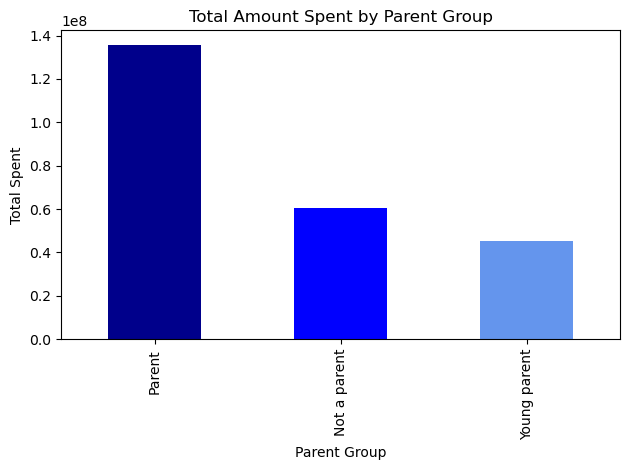

In [263]:
# Creating a bar chart of "parent_sum"
bar_parent_sum = parent_sum.sort_values(ascending=False).plot.bar(color = ['darkblue', 'blue', 'cornflowerblue', 'skyblue'])
plt.xlabel('Parent Group')
plt.ylabel('Total Spent')
plt.title('Total Amount Spent by Parent Group')
         
# Adjust layout to ensure everything fits 
plt.tight_layout() 

# Save the figure with bounding box options 
bar_parent_sum_fig = plt.gcf()

In [289]:
# Exporting total spent by parent group bar chart and saving it as an image in projects folder
bar_parent_sum_fig.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Task 4.10', 'bar_parent_sum.png'))